# TASCA 2

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from scipy import stats


df=pd.read_csv('housing data.csv', sep=',', encoding='latin-1')
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Attribute Information:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dolars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

## Exercici 1

### Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo. También adjunto encontrarás una descripción de las diferentes variables del dataset. ###

#### Datos de entrenamiento o «training data»

Los **datos de entrenamiento o «training data»** son los datos que usamos para entrenar un modelo. La calidad de nuestro modelo de aprendizaje automático va a ser directamente proporcional a la calidad de los datos. Por ello las labores de limpieza, depuración o «data wrangling» consumen un porcentaje importante del tiempo de los científicos de datos.

#### Datos de prueba, validación o «testing data«

Los datos de prueba, validación o **testing data** son los datos que nos “reservamos” para comprobar si el modelo que hemos generado a partir de los datos de entrenamiento “funciona”. Es decir, si las respuestas predichas por el modelo para un caso totalmente nuevo son acertadas o no.

Es importante que el conjunto de datos de prueba tenga un volumen suficiente como para generar resultados estadísticamente significativos, y a la vez, que sea representativo del conjunto de datos global.

Normalmente el conjunto de datos se suele repartir en un 70% de datos de entrenamiento y un 30% de datos de test, pero se puede variar la proporción según el caso. Lo importante es ser siempre conscientes de que hay que evitar el sobreajuste u “overfitting”.

 Por ello, es fundamental cuidar su calidad y buscar siempre el equilibrio entre bias y varianza.


Una vez entendidos los dos tipos de conjutnos de datos con los que trabajaremos, procedemos adividir los datos en los usados para train y test:


Teniendo en cuenta que tenemos 505 lineas de datos:
- Utilizaremos el 80% para el Training Test.
- Y el 20% para el Test Set.


Primero separamos la columna de MEDV que es el precio en miles de dólares de las propiedades

In [22]:
X= df.drop(['MEDV'], axis=1)  #es el precio en miles de dolares
y=df[['MEDV']]

print(X.shape, y.shape)

(505, 13) (505, 1)


Definimos los datos para el Training Test:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
277,0.07978,40.0,6.41,0,0.447,6.482,32.1,4.1403,4,254.0,17.6,396.90,7.19
156,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59
130,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437.0,21.2,396.90,12.26
108,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384.0,20.9,391.23,15.55
272,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270.0,17.8,396.90,5.50
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
60,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284.0,19.7,378.08,14.44
478,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666.0,20.2,383.32,13.11


Con el test_size definimos que porcentaje vamos a usar para el Test Set (20%) y con el print, observamos las dimensiones de cada uno de estos nuevos datasets:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (101, 13) (404, 1) (101, 1)


A partir de esto podemos decir que el training test tiene 404 filas y 13 columnas. Y el testing data tiene 101 filas y 13 columnas elegidas aleatoriamente.


### Training Test : Análisis descriptivo ###

In [25]:
X_train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [26]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.446082,11.392327,11.223515,0.059406,0.554072,6.298295,67.933168,3.833105,9.413366,406.452970,18.473267,359.579158,12.451832
std,8.778372,22.999221,6.911563,0.236676,0.115377,0.680188,28.484000,2.108069,8.649785,168.788061,2.197828,86.862326,7.110180
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079710,0.000000,5.190000,0.000000,0.448000,5.888750,44.225000,2.110500,4.000000,277.000000,17.400000,376.462500,6.840000
50%,0.243125,0.000000,9.690000,0.000000,0.538000,6.229000,76.850000,3.275900,5.000000,330.000000,19.100000,391.385000,11.110000
75%,3.202962,18.125000,18.100000,0.000000,0.624000,6.620500,94.025000,5.255350,24.000000,666.000000,20.200000,396.352500,16.530000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


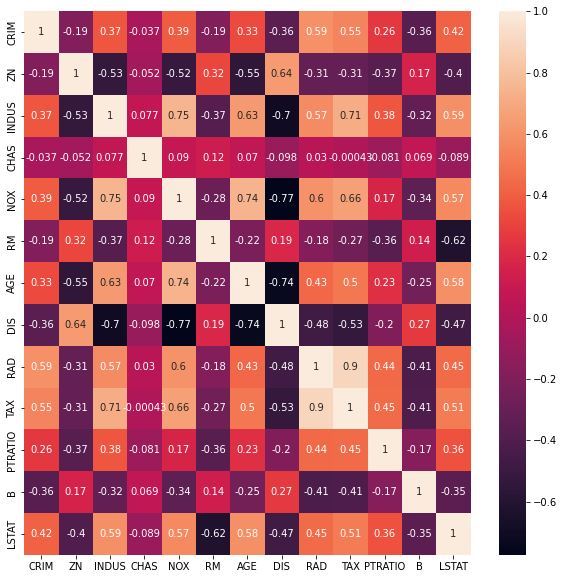

In [27]:
plt.figure(figsize=(10, 10))
matriz_corr = X_train.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

In [28]:
print('H0: La muestra tiene una distribución normal - Probablemente Gaussiana')
print('H1: La muestra no tiene una distribución normal (Probablemente no Gaussiana)')

for i in X_train.columns:
    shapiro_test = stats.shapiro(X_train[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

H0: La muestra tiene una distribución normal - Probablemente Gaussiana
H1: La muestra no tiene una distribución normal (Probablemente no Gaussiana)
La variable CRIM tiene un p-value=  3.5625890961363383e-34
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  1.6812478800375867e-30
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  1.4751775461032757e-15
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CHAS tiene un p-value=  2.5941168999057366e-37
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  3.938451127727394e-12
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable RM tiene un p-value=  3

C:\Users\flore\AppData\Local\Temp\ipykernel_13984\2259672127.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 432x288 with 0 Axes>

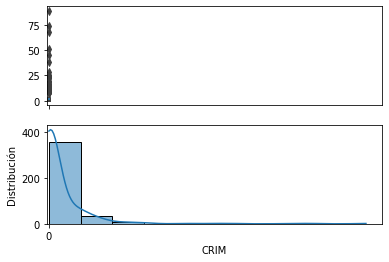

<Figure size 432x288 with 0 Axes>

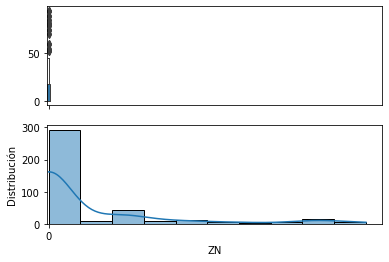

<Figure size 432x288 with 0 Axes>

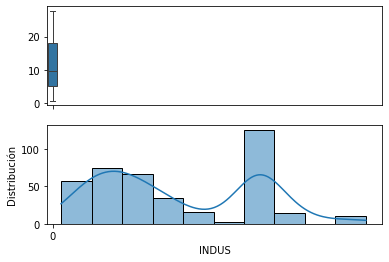

<Figure size 432x288 with 0 Axes>

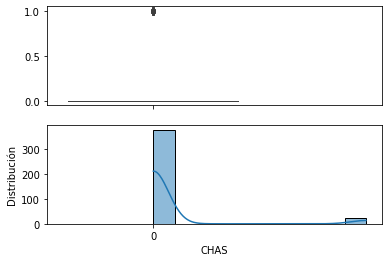

<Figure size 432x288 with 0 Axes>

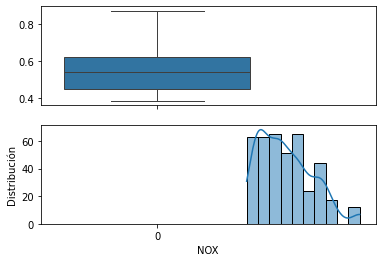

<Figure size 432x288 with 0 Axes>

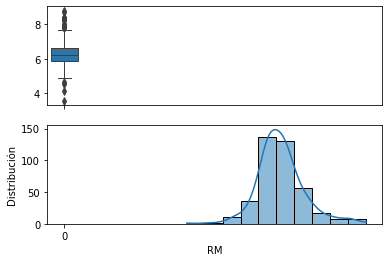

<Figure size 432x288 with 0 Axes>

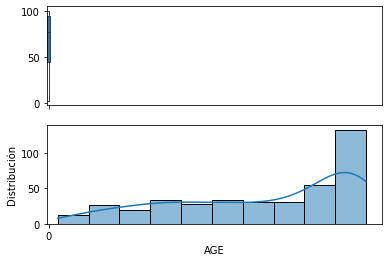

<Figure size 432x288 with 0 Axes>

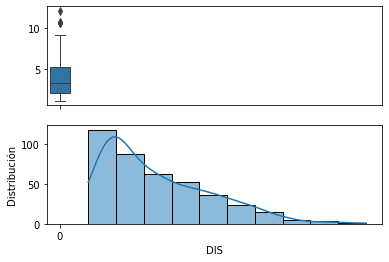

<Figure size 432x288 with 0 Axes>

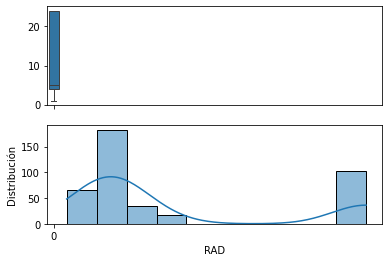

<Figure size 432x288 with 0 Axes>

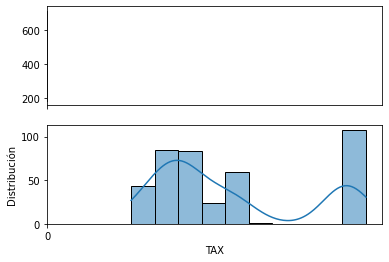

<Figure size 432x288 with 0 Axes>

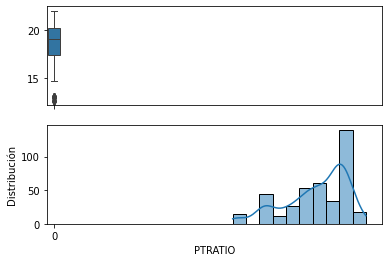

<Figure size 432x288 with 0 Axes>

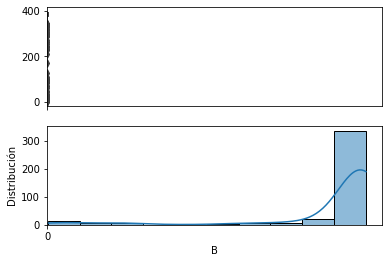

<Figure size 432x288 with 0 Axes>

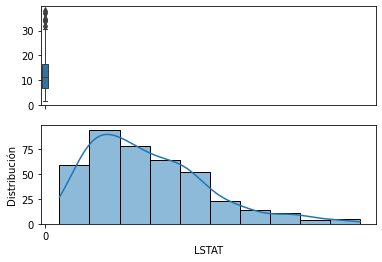

In [29]:
for i in X_train.columns:
    plt.figure()
    plt.tight_layout()
    sns.set
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Distribución')
    sns.boxplot(X_train[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(X_train[i], ax=ax_hist , bins = 10,kde=True)

### Test Set: Análisis descriptivo

In [30]:
X_test.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [31]:
X_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.319004,11.183168,10.877228,0.108911,0.557354,6.227119,71.175248,3.639874,10.178218,416.485149,18.415842,344.655248,13.533960
std,7.895258,24.792713,6.654772,0.313081,0.118958,0.789683,26.890699,2.109882,8.952537,168.594698,2.024882,107.180775,7.228566
min,0.013010,0.000000,0.460000,0.000000,0.392000,3.863000,10.000000,1.178100,1.000000,188.000000,13.600000,2.520000,2.870000
25%,0.087070,0.000000,5.190000,0.000000,0.464000,5.874000,47.200000,1.992900,4.000000,287.000000,17.400000,355.290000,7.670000
50%,0.339830,0.000000,9.690000,0.000000,0.520000,6.137000,82.500000,2.894400,5.000000,370.000000,18.600000,391.500000,12.640000
75%,5.293050,0.000000,18.100000,0.000000,0.655000,6.649000,94.300000,4.540400,24.000000,666.000000,20.200000,395.560000,18.140000
max,41.529200,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,666.000000,21.200000,396.900000,30.630000


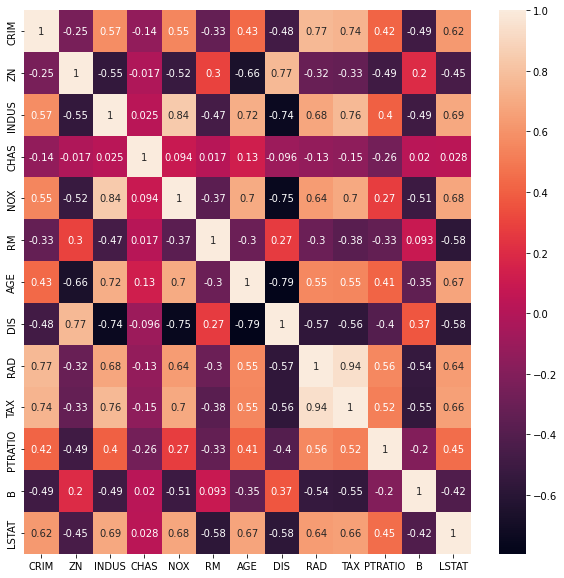

In [32]:
plt.figure(figsize=(10, 10))
matriz_corr = X_test.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

In [33]:
print('H0: La muestra tiene una distribución normal - Probablemente Gaussiana')
print('H1: La muestra no tiene una distribución normal (Probablemente no Gaussiana)')

for i in X_test.columns:
    shapiro_test = stats.shapiro(X_train[i])
    print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
    else:
        print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')

H0: La muestra tiene una distribución normal - Probablemente Gaussiana
H1: La muestra no tiene una distribución normal (Probablemente no Gaussiana)
La variable CRIM tiene un p-value=  3.5625890961363383e-34
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  1.6812478800375867e-30
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  1.4751775461032757e-15
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CHAS tiene un p-value=  2.5941168999057366e-37
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  3.938451127727394e-12
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable RM tiene un p-value=  3

## Exercici 2 

### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Antes de comenzar con la transformación, debemos realizar una copia de nuestro DataFrame, sobre el cual realizaremos el cambio de datos


In [34]:
df_2=df.copy()
df_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Antes que anda debemos saber:

¿Por qué necesitamos transformar los datos?

   - Los datos se transforman a la misma escala para que el algoritmo luego pueda comparar mejor la relación entre los punto de datos.
    
    
¿Cuándo aplicaremos esta tranformación de datos?

   -  Cuando utilicemos algoritmos supervisados, la training y testing data deben transformarse de la misma manera
    
link de interés: https://www.visual-design.net/post/data-transformation-and-feature-engineering-in-python



Luego, debemos tener en cuenta que tipo de variables tenemos:

- La variable CHAS es de tipo dummy, por lo que la dejaremos así.

- Las variables CRIM, ZN, RM, DIS, PTRATIO, B Y LSTAT presentan outliers para las que utilizaremos Robust Scaling

- Y para el resto de las variables: Min Max Scaler

link sobre diferentes métodos: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


1) APLICAMOS ROBUST SCALER:

Las estadísticas de centrado y escalado de RobustScaler se basan en percentiles y, por lo tanto, no están influenciadas por una pequeña cantidad de valores atípicos marginales muy grandes. En consecuencia, el rango resultante de los valores de las características transformadas es mayor que el de los escaladores anteriores y, lo que es más importante, son aproximadamente similares.


   Hay que tener en cuenta que los propios valores atípicos todavía están presentes en los datos transformados. Si se desea un recorte de valores atípicos separado, se requiere una transformación no lineal

In [43]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_2[['CRIM',
'ZN','RM','DIS','PTRATIO','B', 'LSTAT']] = scaler.fit_transform(df_2[['CRIM',
'ZN','RM','DIS','PTRATIO','B', 'LSTAT']])

df_2



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.064471,0.0,0.242302,0,0.172840,0.287838,0.782698,0.568110,0.043478,0.104962,-0.464286,0.261973,-0.225126,21.6
1,-0.064477,0.0,0.242302,0,0.172840,1.320270,0.599382,0.568110,0.043478,0.104962,-0.464286,0.067050,-0.738693,34.7
2,-0.063064,0.0,0.063050,0,0.150206,1.067568,0.441813,0.920017,0.086957,0.066794,-0.142857,0.153257,-0.848241,33.4
3,-0.052864,0.0,0.063050,0,0.150206,1.268919,0.528321,0.920017,0.086957,0.066794,-0.142857,0.261973,-0.608040,36.2
4,-0.063765,0.0,0.063050,0,0.150206,0.300000,0.574665,0.920017,0.086957,0.066794,-0.142857,0.128831,-0.620101,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.054649,0.0,0.420455,0,0.386831,0.520270,0.681771,-0.231563,0.000000,0.164122,0.678571,0.026820,-0.171859,22.4
501,-0.059477,0.0,0.420455,0,0.386831,-0.118919,0.760041,-0.292972,0.000000,0.164122,0.678571,0.261973,-0.231156,20.6
502,-0.055169,0.0,0.420455,0,0.386831,1.037838,0.907312,-0.331534,0.000000,0.164122,0.678571,0.261973,-0.576884,23.9
503,-0.041591,0.0,0.420455,0,0.386831,0.791892,0.889804,-0.260388,0.000000,0.164122,0.678571,0.096743,-0.492462,22.0


2) Aplicamos MinMaxScaler a las variables: INDUS, NOX, AGE, RAD y TAX

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()

df_2[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']] = scaler1.fit_transform(df_2[['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']])

df_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.064471,0.0,0.242302,0,0.172840,0.287838,0.782698,0.568110,0.043478,0.104962,-0.464286,0.261973,-0.225126,21.6
1,-0.064477,0.0,0.242302,0,0.172840,1.320270,0.599382,0.568110,0.043478,0.104962,-0.464286,0.067050,-0.738693,34.7
2,-0.063064,0.0,0.063050,0,0.150206,1.067568,0.441813,0.920017,0.086957,0.066794,-0.142857,0.153257,-0.848241,33.4
3,-0.052864,0.0,0.063050,0,0.150206,1.268919,0.528321,0.920017,0.086957,0.066794,-0.142857,0.261973,-0.608040,36.2
4,-0.063765,0.0,0.063050,0,0.150206,0.300000,0.574665,0.920017,0.086957,0.066794,-0.142857,0.128831,-0.620101,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.054649,0.0,0.420455,0,0.386831,0.520270,0.681771,-0.231563,0.000000,0.164122,0.678571,0.026820,-0.171859,22.4
501,-0.059477,0.0,0.420455,0,0.386831,-0.118919,0.760041,-0.292972,0.000000,0.164122,0.678571,0.261973,-0.231156,20.6
502,-0.055169,0.0,0.420455,0,0.386831,1.037838,0.907312,-0.331534,0.000000,0.164122,0.678571,0.261973,-0.576884,23.9
503,-0.041591,0.0,0.420455,0,0.386831,0.791892,0.889804,-0.260388,0.000000,0.164122,0.678571,0.096743,-0.492462,22.0


## Exercici 3

### Resumeix les noves columnes generades de manera estadística i gràfica


Al realizar la transformación de datos sobre el Data Frame principal y no sobre el test o train podremos ver 

In [46]:
df_3= df_2.drop(['MEDV'], axis=1)  #quitamos la variable medv ya que no está transformada

C:\Users\flore\AppData\Local\Temp\ipykernel_13984\871174954.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 432x288 with 0 Axes>

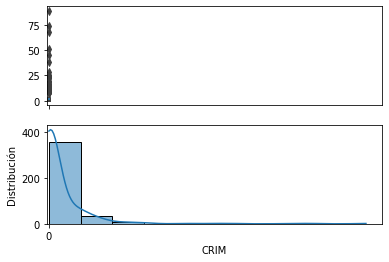

<Figure size 432x288 with 0 Axes>

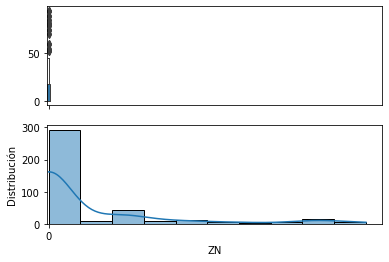

<Figure size 432x288 with 0 Axes>

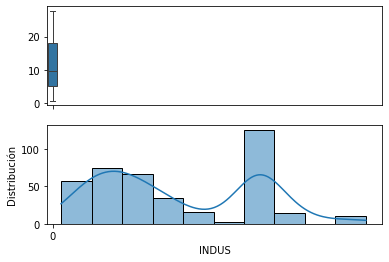

<Figure size 432x288 with 0 Axes>

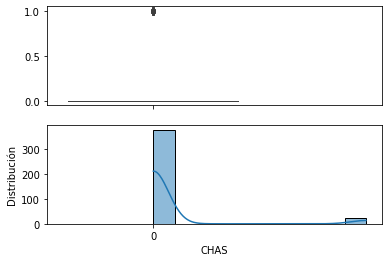

<Figure size 432x288 with 0 Axes>

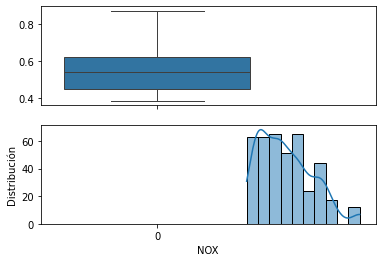

<Figure size 432x288 with 0 Axes>

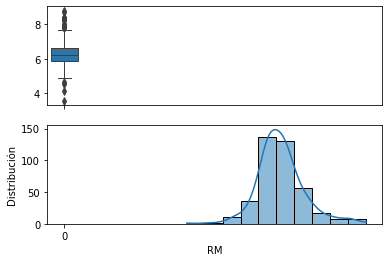

<Figure size 432x288 with 0 Axes>

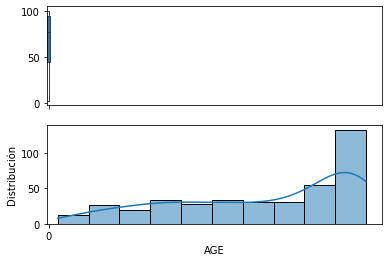

<Figure size 432x288 with 0 Axes>

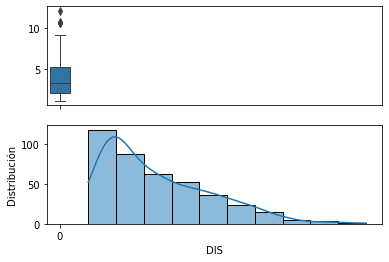

<Figure size 432x288 with 0 Axes>

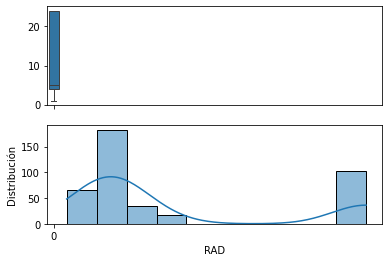

<Figure size 432x288 with 0 Axes>

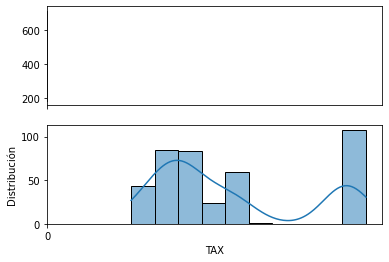

<Figure size 432x288 with 0 Axes>

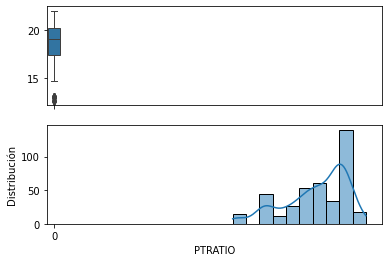

<Figure size 432x288 with 0 Axes>

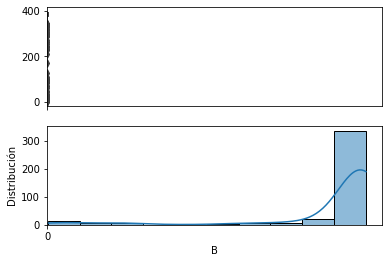

<Figure size 432x288 with 0 Axes>

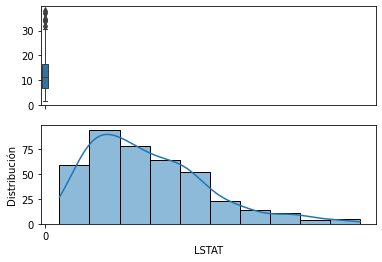

In [48]:
for i in df_3.columns:
    plt.figure()
    plt.tight_layout()
    sns.set
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Distribución')
    sns.boxplot(X_train[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(X_train[i], ax=ax_hist , bins = 10,kde=True)

Podemos observar como las variables son mucho mas fáciles de leer

<AxesSubplot: >

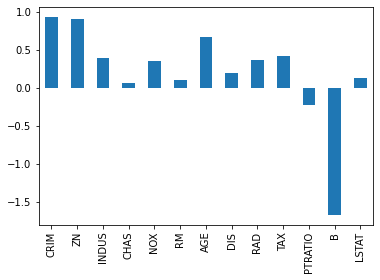

In [58]:
df_3.mean().plot.bar()